## Script 8, Saloni Khandelwal
### Targeted (entity) Sentiment Identification

In [ ]:
import pandas as pd
import spacy
from collections import Counter

In [ ]:
df = pd.read_parquet('entity_nlp.parquet')
df.head()

,url,date,language,title,text,cleaned_text,important_words,tokens,topic,predicted_sentiment_yelp_new,sentiment_numeric,entities,organization,products,GPE
0,http://en.people.cn/n3/2021/0318/c90000-983012...,2021-03-18,en,Artificial intelligence improves parking effic...,\n\nArtificial intelligence improves parking e...,Some urban areas of the city started to use ET...,urban areas city started use etc system roadsi...,"[urban, areas, city, started, use, etc, system...",0,p,1,"[[ETC, ORG], [July 1, 2019, DATE], [ETC, ORG],...","[ETC, ETC, AI, ETC, Wang, ETC, AIpark, AI, AI,...",[],"[Chaoyang, Beijing, Beijing, Beijing, China, C..."
1,http://newsparliament.com/2020/02/27/children-...,2020-02-27,en,Children With Autism Saw Their Learning and So...,\nChildren With Autism Saw Their Learning and ...,Children With Autism Saw Their Learning and So...,children autism saw learning social skills boo...,"[children, autism, saw, learning, social, skil...",1,n,-1,"[[Thursday, February 27, 2020, DATE], [seven, ...","[Kiwi, Kiwi, Kiwi, Science Robotics, Kiwi, Kiw...",[Cancel],"[U.S., Matarić]"
2,http://www.dataweek.co.za/12835r,2021-03-26,en,"Forget ML, AI and Industry 4.0 – obsolescence ...","\n\nForget ML, AI and Industry 4.0 – obsolesce...",The world entered a new era of accelerated tra...,world entered new era accelerated transformati...,"[world, entered, new, era, accelerated, transf...",0,p,1,"[[the last eighteen months, DATE], [years, DAT...","[the Brazilian Embassy, PowerPoint, ML, AI, Ir...",[],"[London, Lego, Mexico, US]"
3,http://www.homeoffice.consumerelectronicsnet.c...,2021-03-10,en,Strategy Analytics: 71% of Smartphones Sold Gl...,\n\nStrategy Analytics: 71% of Smartphones Sol...,AI is used in various functions inside smartph...,ai used various functions inside smartphones i...,"[ai, used, various, functions, inside, smartph...",0,p,1,"[[AI, ORG], [AI, ORG], [AI, ORG], [Edge AI, OR...","[AI, AI, AI, Edge AI, AI, AI, AI, AI, AI, AI, ...",[],[]
4,http://www.itbusinessnet.com/2020/10/olympus-t...,2020-10-20,en,Olympus to Support Endoscopic AI Diagnosis Edu...,\n\nOlympus to Support Endoscopic AI Diagnosis...,"In collaboration with CYBERNET SYSTEMS CO,. LT...",collaboration cybernet systems co ltd olympus ...,"[collaboration, cybernet, systems, co, ltd, ol...",0,p,1,"[[CYBERNET SYSTEMS CO, ORG], [Olympus, ORG], [...","[CYBERNET SYSTEMS CO, Olympus, AI, the Asian I...",[],"[Hyderabad, India, India, Japan, India, India,..."


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 136927 entries, 0 to 200331
Data columns (total 15 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   url                           136927 non-null  object        
 1   date                          136927 non-null  datetime64[ns]
 2   language                      136927 non-null  object        
 3   title                         136927 non-null  object        
 4   text                          136927 non-null  object        
 5   cleaned_text                  136927 non-null  object        
 6   important_words               136927 non-null  object        
 7   tokens                        136927 non-null  object        
 8   topic                         136927 non-null  int64         
 9   predicted_sentiment_yelp_new  136927 non-null  object        
 10  sentiment_numeric             136927 non-null  int64         
 11  entities          

In [ ]:
df_exploded = df.assign(Entity=df['entities']).explode('Entity')

In [ ]:
df_exploded.head()

,url,date,language,title,text,cleaned_text,important_words,tokens,topic,predicted_sentiment_yelp_new,sentiment_numeric,entities,organization,products,GPE,Entity
0,http://en.people.cn/n3/2021/0318/c90000-983012...,2021-03-18,en,Artificial intelligence improves parking effic...,\n\nArtificial intelligence improves parking e...,Some urban areas of the city started to use ET...,urban areas city started use etc system roadsi...,"[urban, areas, city, started, use, etc, system...",0,p,1,"[[ETC, ORG], [July 1, 2019, DATE], [ETC, ORG],...","[ETC, ETC, AI, ETC, Wang, ETC, AIpark, AI, AI,...",[],"[Chaoyang, Beijing, Beijing, Beijing, China, C...","[ETC, ORG]"
0,http://en.people.cn/n3/2021/0318/c90000-983012...,2021-03-18,en,Artificial intelligence improves parking effic...,\n\nArtificial intelligence improves parking e...,Some urban areas of the city started to use ET...,urban areas city started use etc system roadsi...,"[urban, areas, city, started, use, etc, system...",0,p,1,"[[ETC, ORG], [July 1, 2019, DATE], [ETC, ORG],...","[ETC, ETC, AI, ETC, Wang, ETC, AIpark, AI, AI,...",[],"[Chaoyang, Beijing, Beijing, Beijing, China, C...","[July 1, 2019, DATE]"
0,http://en.people.cn/n3/2021/0318/c90000-983012...,2021-03-18,en,Artificial intelligence improves parking effic...,\n\nArtificial intelligence improves parking e...,Some urban areas of the city started to use ET...,urban areas city started use etc system roadsi...,"[urban, areas, city, started, use, etc, system...",0,p,1,"[[ETC, ORG], [July 1, 2019, DATE], [ETC, ORG],...","[ETC, ETC, AI, ETC, Wang, ETC, AIpark, AI, AI,...",[],"[Chaoyang, Beijing, Beijing, Beijing, China, C...","[ETC, ORG]"
0,http://en.people.cn/n3/2021/0318/c90000-983012...,2021-03-18,en,Artificial intelligence improves parking effic...,\n\nArtificial intelligence improves parking e...,Some urban areas of the city started to use ET...,urban areas city started use etc system roadsi...,"[urban, areas, city, started, use, etc, system...",0,p,1,"[[ETC, ORG], [July 1, 2019, DATE], [ETC, ORG],...","[ETC, ETC, AI, ETC, Wang, ETC, AIpark, AI, AI,...",[],"[Chaoyang, Beijing, Beijing, Beijing, China, C...","[90 percent, PERCENT]"
0,http://en.people.cn/n3/2021/0318/c90000-983012...,2021-03-18,en,Artificial intelligence improves parking effic...,\n\nArtificial intelligence improves parking e...,Some urban areas of the city started to use ET...,urban areas city started use etc system roadsi...,"[urban, areas, city, started, use, etc, system...",0,p,1,"[[ETC, ORG], [July 1, 2019, DATE], [ETC, ORG],...","[ETC, ETC, AI, ETC, Wang, ETC, AIpark, AI, AI,...",[],"[Chaoyang, Beijing, Beijing, Beijing, China, C...","[AI, ORG]"


In [ ]:
df_exploded[['entity_name', 'entity_type']] = df_exploded['Entity'].apply(pd.Series)

In [ ]:
df_exploded.head()

,url,date,language,title,text,cleaned_text,important_words,tokens,topic,predicted_sentiment_yelp_new,sentiment_numeric,entities,organization,products,GPE,Entity,entity_name,entity_type
0,http://en.people.cn/n3/2021/0318/c90000-983012...,2021-03-18,en,Artificial intelligence improves parking effic...,\n\nArtificial intelligence improves parking e...,Some urban areas of the city started to use ET...,urban areas city started use etc system roadsi...,"[urban, areas, city, started, use, etc, system...",0,p,1,"[[ETC, ORG], [July 1, 2019, DATE], [ETC, ORG],...","[ETC, ETC, AI, ETC, Wang, ETC, AIpark, AI, AI,...",[],"[Chaoyang, Beijing, Beijing, Beijing, China, C...","[ETC, ORG]",ETC,ORG
0,http://en.people.cn/n3/2021/0318/c90000-983012...,2021-03-18,en,Artificial intelligence improves parking effic...,\n\nArtificial intelligence improves parking e...,Some urban areas of the city started to use ET...,urban areas city started use etc system roadsi...,"[urban, areas, city, started, use, etc, system...",0,p,1,"[[ETC, ORG], [July 1, 2019, DATE], [ETC, ORG],...","[ETC, ETC, AI, ETC, Wang, ETC, AIpark, AI, AI,...",[],"[Chaoyang, Beijing, Beijing, Beijing, China, C...","[July 1, 2019, DATE]","July 1, 2019",DATE
0,http://en.people.cn/n3/2021/0318/c90000-983012...,2021-03-18,en,Artificial intelligence improves parking effic...,\n\nArtificial intelligence improves parking e...,Some urban areas of the city started to use ET...,urban areas city started use etc system roadsi...,"[urban, areas, city, started, use, etc, system...",0,p,1,"[[ETC, ORG], [July 1, 2019, DATE], [ETC, ORG],...","[ETC, ETC, AI, ETC, Wang, ETC, AIpark, AI, AI,...",[],"[Chaoyang, Beijing, Beijing, Beijing, China, C...","[ETC, ORG]",ETC,ORG
0,http://en.people.cn/n3/2021/0318/c90000-983012...,2021-03-18,en,Artificial intelligence improves parking effic...,\n\nArtificial intelligence improves parking e...,Some urban areas of the city started to use ET...,urban areas city started use etc system roadsi...,"[urban, areas, city, started, use, etc, system...",0,p,1,"[[ETC, ORG], [July 1, 2019, DATE], [ETC, ORG],...","[ETC, ETC, AI, ETC, Wang, ETC, AIpark, AI, AI,...",[],"[Chaoyang, Beijing, Beijing, Beijing, China, C...","[90 percent, PERCENT]",90 percent,PERCENT
0,http://en.people.cn/n3/2021/0318/c90000-983012...,2021-03-18,en,Artificial intelligence improves parking effic...,\n\nArtificial intelligence improves parking e...,Some urban areas of the city started to use ET...,urban areas city started use etc system roadsi...,"[urban, areas, city, started, use, etc, system...",0,p,1,"[[ETC, ORG], [July 1, 2019, DATE], [ETC, ORG],...","[ETC, ETC, AI, ETC, Wang, ETC, AIpark, AI, AI,...",[],"[Chaoyang, Beijing, Beijing, Beijing, China, C...","[AI, ORG]",AI,ORG


In [ ]:
sentiment_distribution = df_exploded['predicted_sentiment_yelp_new'].value_counts(normalize=True) * 100
print("Sentiment Distribution:")
print(sentiment_distribution)

Sentiment Distribution:
predicted_sentiment_yelp_new
p      73.314929
n      15.110155
neu    11.574917
Name: proportion, dtype: float64


In [ ]:
positive_df_actual = df_exploded[df_exploded['predicted_sentiment_yelp_new'] == 'p']
negative_df_actual = df_exploded[df_exploded['predicted_sentiment_yelp_new'] == 'n']

In [ ]:
positive_df.head()

,url,date,language,title,text,cleaned_text,important_words,tokens,topic,predicted_sentiment_yelp_new,sentiment_numeric,entities,organization,products,GPE
0,http://en.people.cn/n3/2021/0318/c90000-983012...,2021-03-18,en,Artificial intelligence improves parking effic...,\n\nArtificial intelligence improves parking e...,Some urban areas of the city started to use ET...,urban areas city started use etc system roadsi...,"[urban, areas, city, started, use, etc, system...",0,p,1,"[[ETC, ORG], [July 1, 2019, DATE], [ETC, ORG],...","[ETC, ETC, AI, ETC, Wang, ETC, AIpark, AI, AI,...",[],"[Chaoyang, Beijing, Beijing, Beijing, China, C..."
2,http://www.dataweek.co.za/12835r,2021-03-26,en,"Forget ML, AI and Industry 4.0 – obsolescence ...","\n\nForget ML, AI and Industry 4.0 – obsolesce...",The world entered a new era of accelerated tra...,world entered new era accelerated transformati...,"[world, entered, new, era, accelerated, transf...",0,p,1,"[[the last eighteen months, DATE], [years, DAT...","[the Brazilian Embassy, PowerPoint, ML, AI, Ir...",[],"[London, Lego, Mexico, US]"
3,http://www.homeoffice.consumerelectronicsnet.c...,2021-03-10,en,Strategy Analytics: 71% of Smartphones Sold Gl...,\n\nStrategy Analytics: 71% of Smartphones Sol...,AI is used in various functions inside smartph...,ai used various functions inside smartphones i...,"[ai, used, various, functions, inside, smartph...",0,p,1,"[[AI, ORG], [AI, ORG], [AI, ORG], [Edge AI, OR...","[AI, AI, AI, Edge AI, AI, AI, AI, AI, AI, AI, ...",[],[]
4,http://www.itbusinessnet.com/2020/10/olympus-t...,2020-10-20,en,Olympus to Support Endoscopic AI Diagnosis Edu...,\n\nOlympus to Support Endoscopic AI Diagnosis...,"In collaboration with CYBERNET SYSTEMS CO,. LT...",collaboration cybernet systems co ltd olympus ...,"[collaboration, cybernet, systems, co, ltd, ol...",0,p,1,"[[CYBERNET SYSTEMS CO, ORG], [Olympus, ORG], [...","[CYBERNET SYSTEMS CO, Olympus, AI, the Asian I...",[],"[Hyderabad, India, India, Japan, India, India,..."
5,http://www.mysmartrend.com/news-briefs/technic...,2020-04-17,en,Cr Bard Inc Has Returned 48.9% Since SmarTrend...,\n\nCr Bard Inc Has Returned 48.9% Since SmarT...,"In the last five trading sessions, the 50-day ...",last five trading sessions 50day moving averag...,"[last, five, trading, sessions, 50day, moving,...",0,p,1,"[[five, CARDINAL], [50-day, DATE], [MA, PERSON...","[Company, bcr cr bard inc Ticker(s, BCR Contac...",[],[]


In [ ]:
import matplotlib.pyplot as plt

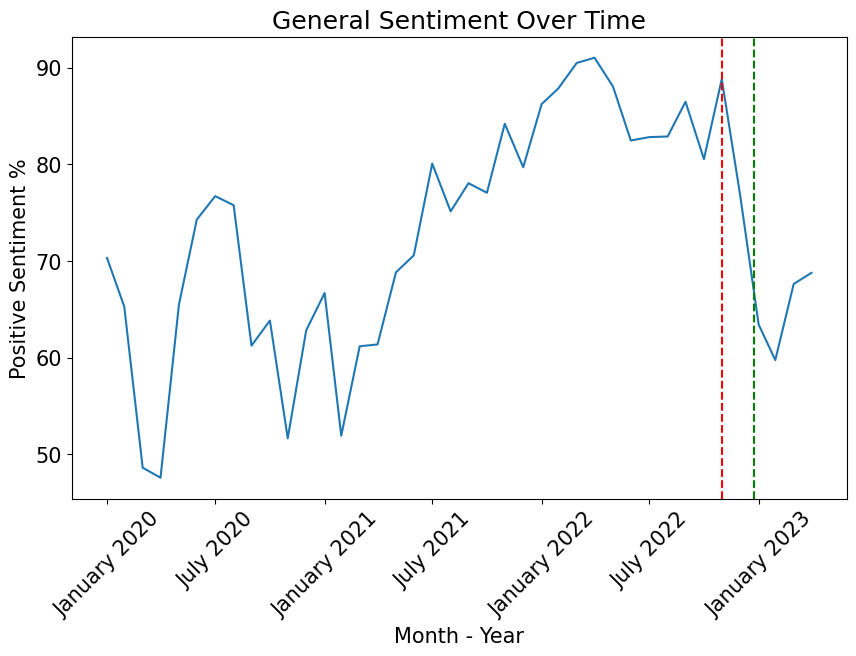

In [ ]:
positive_df = df[df['predicted_sentiment_yelp_new'] == 'p']

monthly_positive_counts = positive_df.groupby(pd.Grouper(key='date', freq='M')).size()
monthly_total_counts = df.groupby(pd.Grouper(key='date', freq='M')).size()

monthly_sentiment_percent = (monthly_positive_counts / monthly_total_counts) * 100

plt.rcParams.update({'font.size': 15})

plt.figure(figsize=(10, 6))
plt.plot(monthly_sentiment_percent.index, monthly_sentiment_percent)
plt.title('General Sentiment Over Time')
plt.xlabel('Month - Year')
plt.ylabel('Positive Sentiment %')
plt.xticks(rotation=45)

tick_locations = monthly_sentiment_percent.index[::6]
tick_labels = [date.strftime('%B %Y') for date in tick_locations]
plt.axvline(pd.Timestamp('2022-12-01'), color='red', linestyle='--')
plt.axvline(pd.Timestamp('2023-01-23'), color='green', linestyle='--')

plt.xticks(tick_locations, tick_labels)

plt.show()

#### General Sentiment For Entity Type

PERSON - People, including fictional.

NORP - Nationalities or religious or political groups.

FAC - Buildings, airports, highways, bridges, etc.

ORG - Companies, agencies, institutions, etc.

GPE - Countries, cities, states.

LOC - Non-GPE locations, mountain ranges, bodies of water.

PRODUCT - Objects, vehicles, foods, etc. (Not services.)

EVENT - Named hurricanes, battles, wars, sports events, etc.

WORK_OF_ART - Titles of books, songs, etc.

LAW - Named documents made into laws.

LANGUAGE - Any named language.

DATE - Absolute or relative dates or periods.

TIME - Times smaller than a day.

PERCENT - Percentage, including "%".

MONEY - Monetary values, including unit.

QUANTITY - Measurements, as of weight or distance.

ORDINAL - "first", "second", etc.

CARDINAL - Numerals that do not fall under another type.



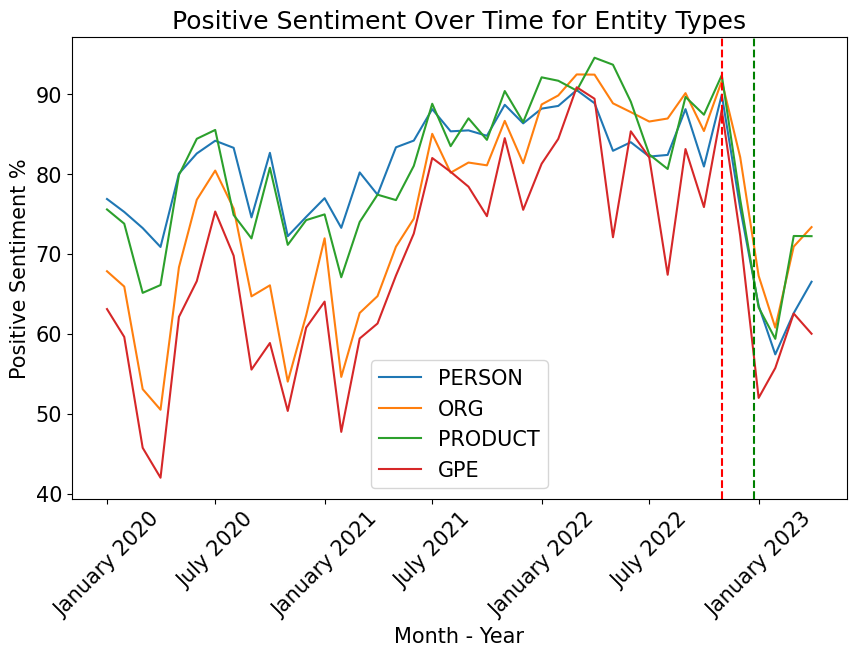

In [ ]:
entities = ['PERSON', 'ORG', 'PRODUCT', 'GPE']

plt.figure(figsize=(10, 6))

for entity in entities:
    filtered_df = df_exploded[(df_exploded['entity_type'] == entity) & (df_exploded['predicted_sentiment_yelp_new'] == 'p')]

    monthly_positive_counts = filtered_df.groupby(pd.Grouper(key='date', freq='M')).size()
    monthly_total_counts = df_exploded[df_exploded['entity_type'] == entity].groupby(pd.Grouper(key='date', freq='M')).size()

    monthly_positive_sentiment_percent = (monthly_positive_counts / monthly_total_counts) * 100

    plt.plot(monthly_positive_sentiment_percent.index, monthly_positive_sentiment_percent, label=entity)

plt.title('Positive Sentiment Over Time for Entity Types')
plt.xlabel('Month - Year')
plt.ylabel('Positive Sentiment %')

tick_locations = monthly_sentiment_percent.index[::6]
tick_labels = [date.strftime('%B %Y') for date in tick_locations]
plt.xticks(tick_locations, tick_labels)

plt.axvline(pd.Timestamp('2022-11-30'), color='red', linestyle='--')
plt.axvline(pd.Timestamp('2023-01-23'), color='green', linestyle='--')

plt.legend()

plt.xticks(rotation=45)
plt.show()

In [ ]:
import numpy as np

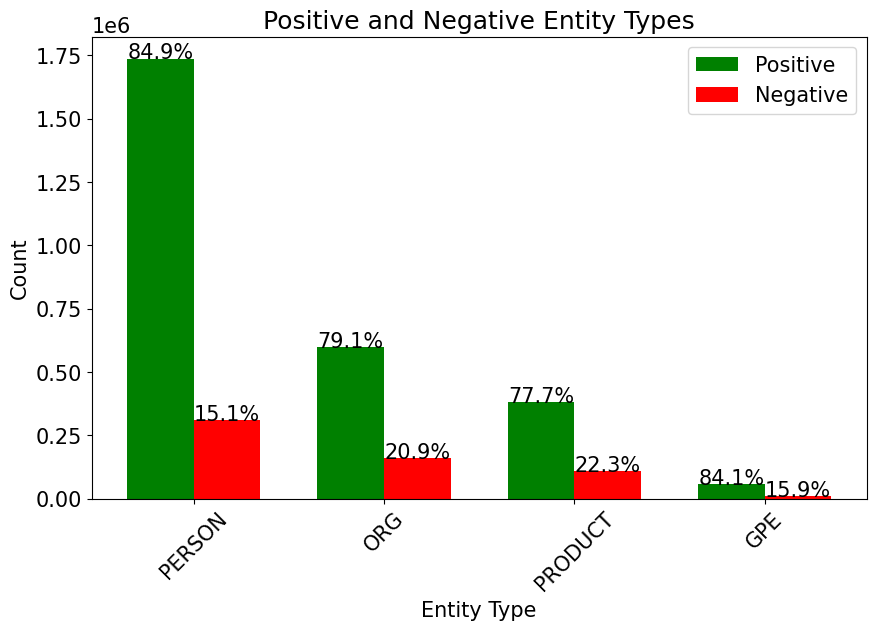

In [ ]:
entities = ['PERSON', 'ORG', 'PRODUCT', 'GPE']

positive_entities_df2 = positive_df_actual[positive_df_actual['entity_type'].isin(entities)]
negative_entities_df2 = negative_df_actual[negative_df_actual['entity_type'].isin(entities)]

positive_counts2 = positive_entities_df2['entity_type'].value_counts()

negative_counts2 = negative_entities_df2['entity_type'].value_counts()

combined_counts2 = pd.concat([positive_counts2, negative_counts2], axis=1, sort=False).fillna(0)
combined_counts2.columns = ['Positive', 'Negative']

plt.figure(figsize=(10, 6))
x = np.arange(len(entities))
width = 0.35

plt.bar(x - width/2, combined_counts2['Positive'], width, color='green', label='Positive')
plt.bar(x + width/2, combined_counts2['Negative'], width, color='red', label='Negative')

plt.title('Positive and Negative Entity Types')
plt.xlabel('Entity Type')
plt.ylabel('Count')

plt.xticks(x, entities, rotation=45)
plt.legend()

for i, count in enumerate(combined_counts2.iterrows()):
    positive_count = count[1]['Positive']
    negative_count = count[1]['Negative']
    total_count = positive_count + negative_count
    plt.text(x[i] - width/2, positive_count + 10, f"{(positive_count/total_count)*100:.1f}%", ha='center', color='black')
    plt.text(x[i] + width/2, negative_count + 10, f"{(negative_count/total_count)*100:.1f}%", ha='center', color='black')

plt.show()

#### Plot ORG Entities Over Time

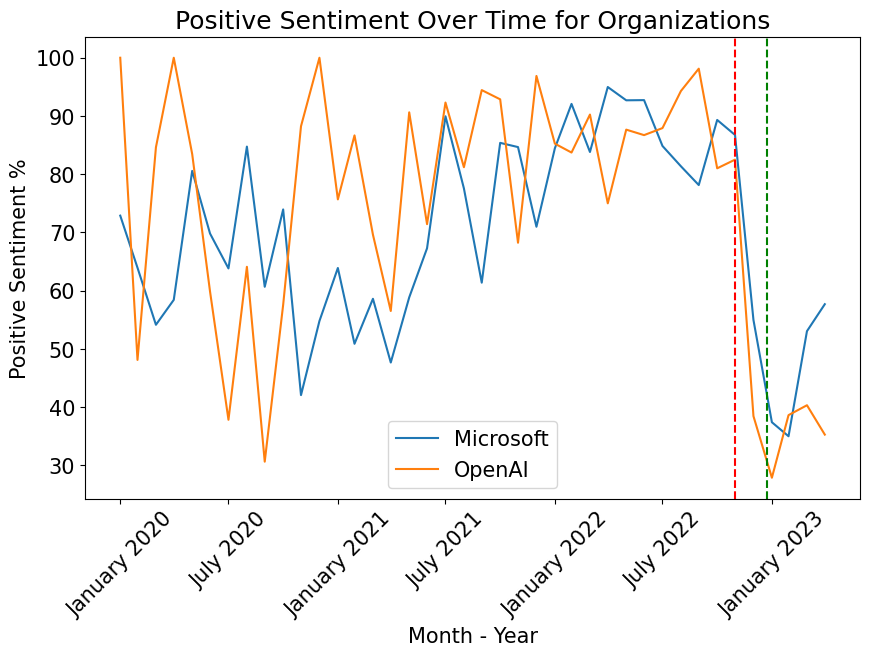

In [ ]:
entities = ['Microsoft', 'OpenAI']

plt.figure(figsize=(10, 6))

for entity in entities:
    filtered_df = df_exploded[(df_exploded['entity_name'] == entity) & (df_exploded['predicted_sentiment_yelp_new'] == 'p')]

    monthly_positive_counts = filtered_df.groupby(pd.Grouper(key='date', freq='M')).size()
    monthly_total_counts = df_exploded[df_exploded['entity_name'] == entity].groupby(pd.Grouper(key='date', freq='M')).size()

    monthly_positive_sentiment_percent = (monthly_positive_counts / monthly_total_counts) * 100

    plt.plot(monthly_positive_sentiment_percent.index, monthly_positive_sentiment_percent, label=entity)

plt.title('Positive Sentiment Over Time for Organizations')
plt.xlabel('Month - Year')
plt.ylabel('Positive Sentiment %')

tick_locations = monthly_sentiment_percent.index[::6]
tick_labels = [date.strftime('%B %Y') for date in tick_locations]
plt.xticks(tick_locations, tick_labels)

plt.axvline(pd.Timestamp('2022-11-30'), color='red', linestyle='--')
plt.axvline(pd.Timestamp('2023-01-23'), color='green', linestyle='--')

plt.legend()  # Add a legend to distinguish between entities

plt.xticks(rotation=45)
plt.show()

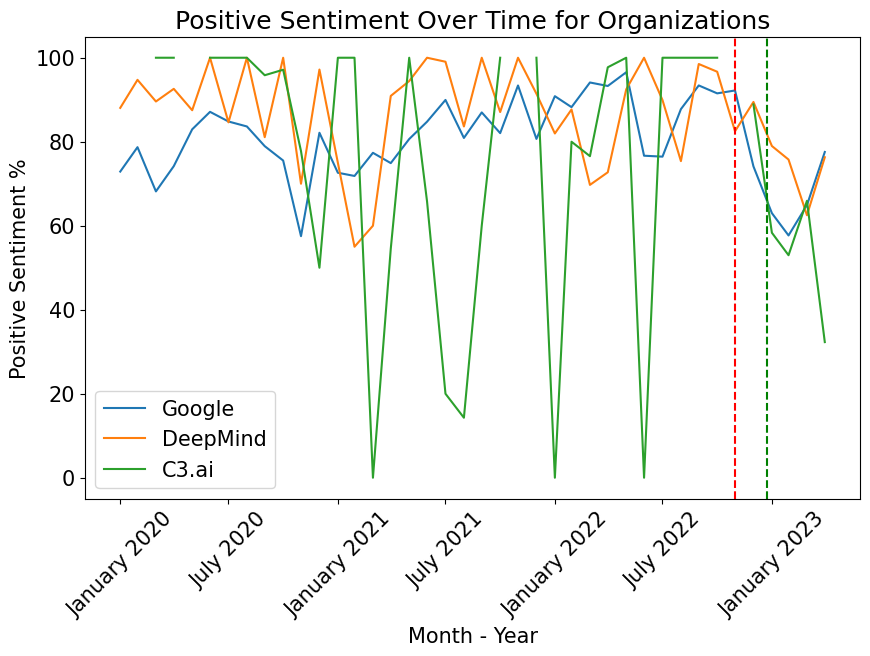

In [ ]:
entities = [ 'Google', 'DeepMind', 'C3.ai']

plt.figure(figsize=(10, 6))

for entity in entities:
    filtered_df = df_exploded[(df_exploded['entity_name'] == entity) & (df_exploded['predicted_sentiment_yelp_new'] == 'p')]

    monthly_positive_counts = filtered_df.groupby(pd.Grouper(key='date', freq='M')).size()
    monthly_total_counts = df_exploded[df_exploded['entity_name'] == entity].groupby(pd.Grouper(key='date', freq='M')).size()

    monthly_positive_sentiment_percent = (monthly_positive_counts / monthly_total_counts) * 100

    plt.plot(monthly_positive_sentiment_percent.index, monthly_positive_sentiment_percent, label=entity)

plt.title('Positive Sentiment Over Time for Organizations')
plt.xlabel('Month - Year')
plt.ylabel('Positive Sentiment %')

tick_locations = monthly_sentiment_percent.index[::6]
tick_labels = [date.strftime('%B %Y') for date in tick_locations]

plt.axvline(pd.Timestamp('2022-11-30'), color='red', linestyle='--')
plt.axvline(pd.Timestamp('2023-01-23'), color='green', linestyle='--')

plt.legend()
plt.xticks(tick_locations, tick_labels)
plt.xticks(rotation=45)
plt.show()

#### Plot Product Entities Over Time

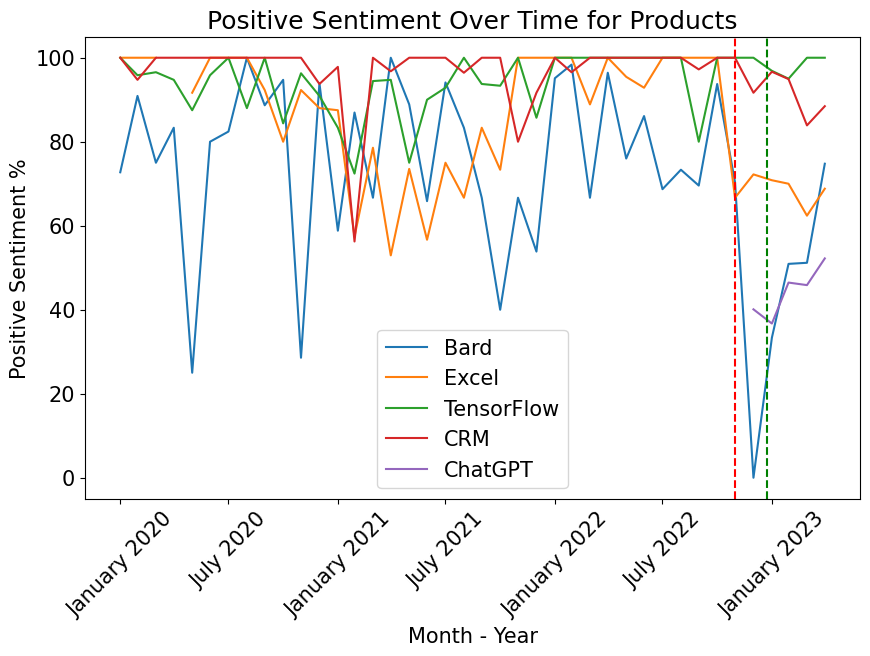

In [ ]:
entities = ['Bard', 'Excel', 'TensorFlow', 'CRM', 'ChatGPT']

plt.figure(figsize=(10, 6))

for entity in entities:
    filtered_df = df_exploded[(df_exploded['entity_name'] == entity) & (df_exploded['predicted_sentiment_yelp_new'] == 'p')]

    monthly_positive_counts = filtered_df.groupby(pd.Grouper(key='date', freq='M')).size()
    monthly_total_counts = df_exploded[df_exploded['entity_name'] == entity].groupby(pd.Grouper(key='date', freq='M')).size()

    monthly_positive_sentiment_percent = (monthly_positive_counts / monthly_total_counts) * 100

    plt.plot(monthly_positive_sentiment_percent.index, monthly_positive_sentiment_percent, label=entity)

plt.title('Positive Sentiment Over Time for Products')
plt.xlabel('Month - Year')
plt.ylabel('Positive Sentiment %')

tick_locations = monthly_sentiment_percent.index[::6]
tick_labels = [date.strftime('%B %Y') for date in tick_locations]

plt.axvline(pd.Timestamp('2022-11-30'), color='red', linestyle='--')
plt.axvline(pd.Timestamp('2023-01-23'), color='green', linestyle='--')

plt.legend()
plt.xticks(tick_locations, tick_labels)
plt.xticks(rotation=45)
plt.show()

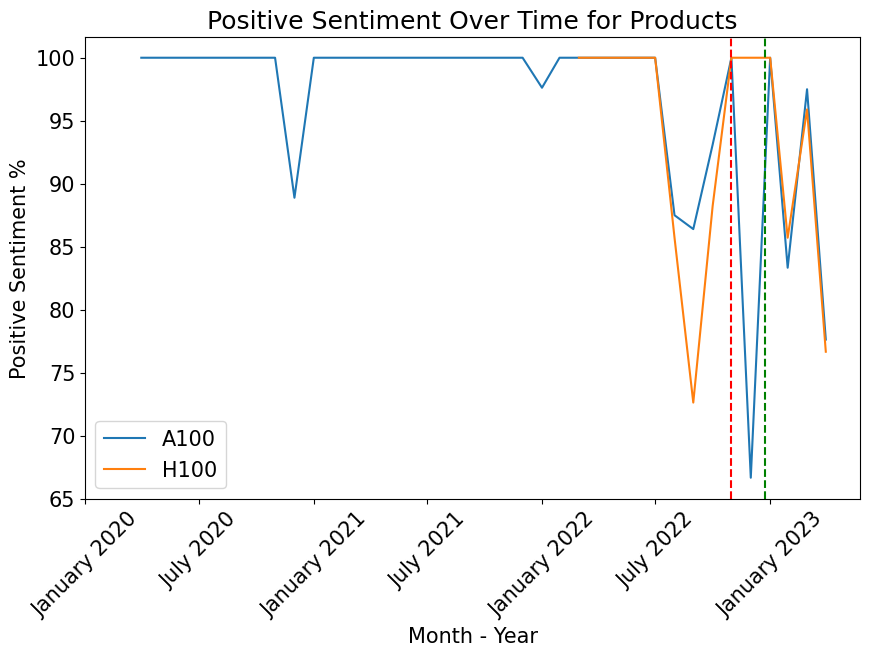

In [ ]:
entities = [ 'A100', 'H100']

plt.figure(figsize=(10, 6))

for entity in entities:
    filtered_df = df_exploded[(df_exploded['entity_name'] == entity) & (df_exploded['predicted_sentiment_yelp_new'] == 'p')]

    monthly_positive_counts = filtered_df.groupby(pd.Grouper(key='date', freq='M')).size()
    monthly_total_counts = df_exploded[df_exploded['entity_name'] == entity].groupby(pd.Grouper(key='date', freq='M')).size()

    monthly_positive_sentiment_percent = (monthly_positive_counts / monthly_total_counts) * 100

    plt.plot(monthly_positive_sentiment_percent.index, monthly_positive_sentiment_percent, label=entity)

plt.title('Positive Sentiment Over Time for Products')
plt.xlabel('Month - Year')
plt.ylabel('Positive Sentiment %')

tick_locations = monthly_sentiment_percent.index[::6]
tick_labels = [date.strftime('%B %Y') for date in tick_locations]

plt.axvline(pd.Timestamp('2022-11-30'), color='red', linestyle='--')
plt.axvline(pd.Timestamp('2023-01-23'), color='green', linestyle='--')

plt.legend()
plt.xticks(tick_locations, tick_labels)
plt.xticks(rotation=45)
plt.show()

#### Plot GPE Entities Over Time

China
US
India
UK
Canada
Japan
Russia
California
San Francisco
New York
US


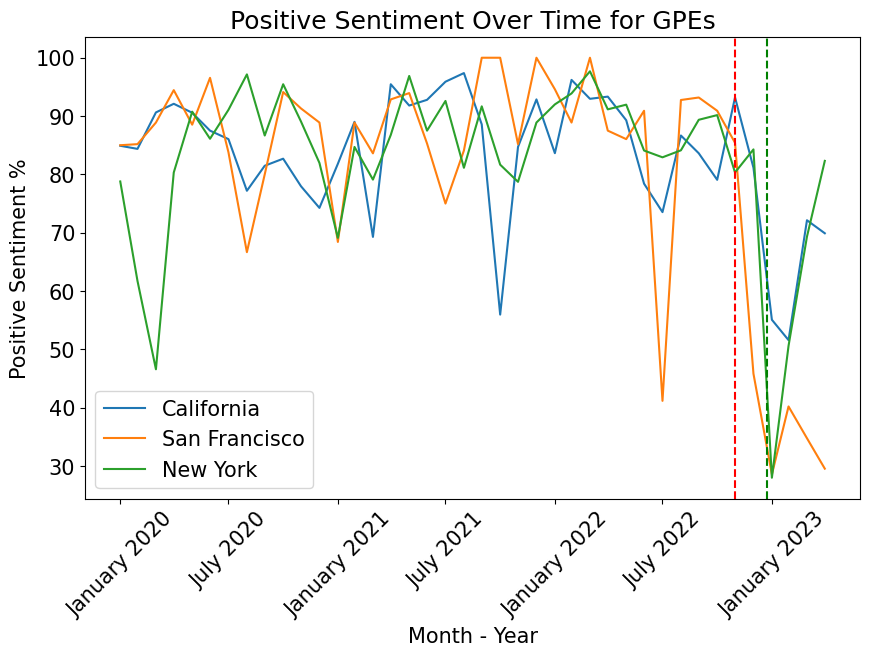

In [ ]:
entities = [ 'California', 'San Francisco', 'New York']

plt.figure(figsize=(10, 6))

for entity in entities:
    filtered_df = df_exploded[(df_exploded['entity_name'] == entity) & (df_exploded['predicted_sentiment_yelp_new'] == 'p')]

    monthly_positive_counts = filtered_df.groupby(pd.Grouper(key='date', freq='M')).size()
    monthly_total_counts = df_exploded[df_exploded['entity_name'] == entity].groupby(pd.Grouper(key='date', freq='M')).size()

    monthly_positive_sentiment_percent = (monthly_positive_counts / monthly_total_counts) * 100

    plt.plot(monthly_positive_sentiment_percent.index, monthly_positive_sentiment_percent, label=entity)

plt.title('Positive Sentiment Over Time for GPEs')
plt.xlabel('Month - Year')
plt.ylabel('Positive Sentiment %')

tick_locations = monthly_sentiment_percent.index[::6]
tick_labels = [date.strftime('%B %Y') for date in tick_locations]

plt.axvline(pd.Timestamp('2022-11-30'), color='red', linestyle='--')
plt.axvline(pd.Timestamp('2023-01-23'), color='green', linestyle='--')

plt.legend()
plt.xticks(tick_locations, tick_labels)
plt.xticks(rotation=45)
plt.show()

### Entitites of Each Sentiment

In [ ]:
df_exploded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5813329 entries, 0 to 200331
Data columns (total 18 columns):
 #   Column                        Dtype         
---  ------                        -----         
 0   url                           object        
 1   date                          datetime64[ns]
 2   language                      object        
 3   title                         object        
 4   text                          object        
 5   cleaned_text                  object        
 6   important_words               object        
 7   tokens                        object        
 8   topic                         int64         
 9   predicted_sentiment_yelp_new  object        
 10  sentiment_numeric             int64         
 11  entities                      object        
 12  organization                  object        
 13  products                      object        
 14  GPE                           object        
 15  Entity                        object  

In [ ]:
import pandas as pd
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
positive_df = df_exploded[df_exploded['predicted_sentiment_yelp_new'] == 'p']
negative_df = df_exploded[df_exploded['predicted_sentiment_yelp_new'] == 'n']

In [ ]:
positive_entities = positive_df['entity_name'].value_counts().head(20)
negative_entities = negative_df['entity_name'].value_counts().head(20)

print("Most common entities in positive sentiment:")
print(positive_entities)

print("\nMost common entities in negative sentiment:")
print(negative_entities)

Most common entities in positive sentiment:
entity_name
AI           370341
first         43197
Google        40729
one           37942
Microsoft     24564
two           22494
today         22069
OpenAI        17052
One           15516
US            15378
U.S.          14857
2021          14294
China         13975
ML            13859
India         13703
2020          13517
COVID-19      11999
three         11932
2022          11406
5             11075
Name: count, dtype: int64

Most common entities in negative sentiment:
entity_name
AI           61799
OpenAI       25515
Microsoft    21056
Google       14543
first         8346
one           6908
Bing          6814
Bard          6125
China         5182
GPT-4         5056
Twitter       4955
US            4104
2023          3645
U.S.          3434
Musk          3363
two           3297
Chinese       3121
Tuesday       3106
today         2966
Elon Musk     2633
Name: count, dtype: int64


In [ ]:
entities = ['OpenAI', 'Microsoft', 'Google', 'Bing', 'DeepMind', 'C3.ai', 'Nvidia']

positive_entities_df = positive_df[positive_df['entity_name'].isin(entities)]
negative_entities_df = negative_df[negative_df['entity_name'].isin(entities)]

positive_counts = positive_entities_df['entity_name'].value_counts()

negative_counts = negative_entities_df['entity_name'].value_counts()

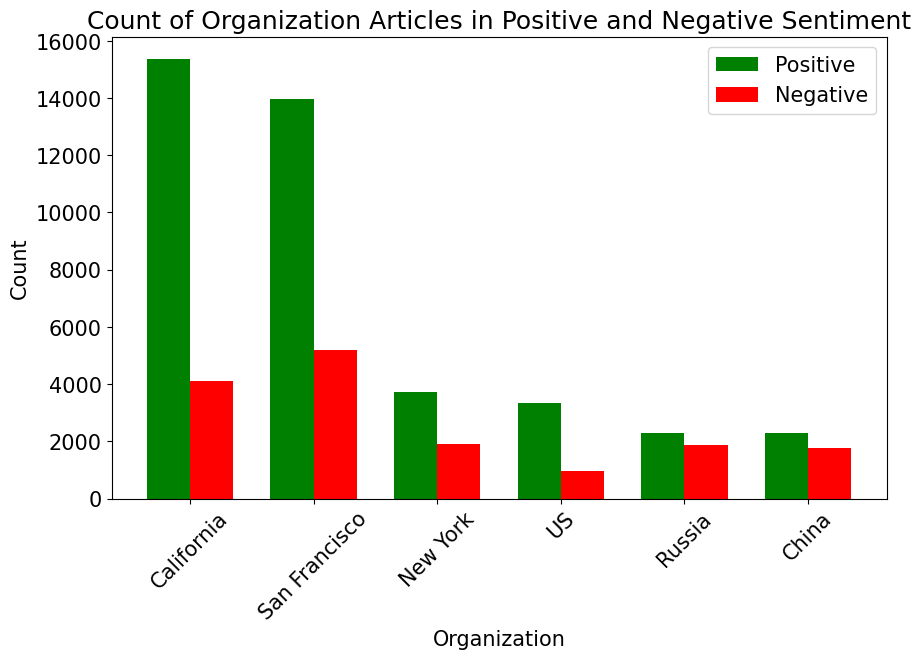

In [ ]:
combined_counts = pd.concat([positive_counts, negative_counts], axis=1, sort=False).fillna(0)
combined_counts.columns = ['Positive', 'Negative']

plt.figure(figsize=(10, 6))
x = np.arange(len(entities))
width = 0.35

plt.bar(x - width/2, combined_counts['Positive'], width, color='green', label='Positive')
plt.bar(x + width/2, combined_counts['Negative'], width, color='red', label='Negative')

plt.title('Count of Organization Articles in Positive and Negative Sentiment')
plt.xlabel('Organization')
plt.ylabel('Count')

plt.xticks(x, entities, rotation=45)
plt.legend()
plt.show()


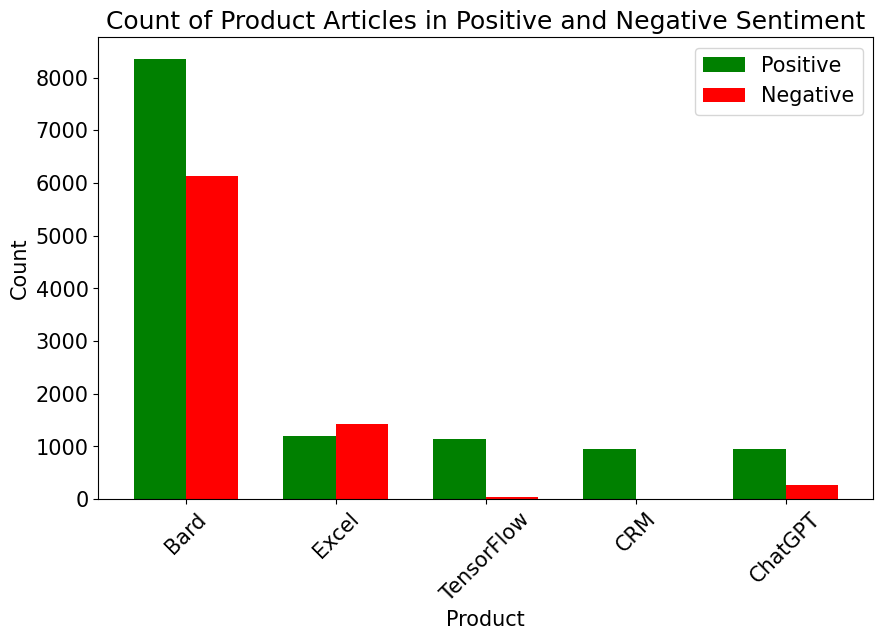

In [ ]:
entities = ['Bard', 'Excel', 'TensorFlow', 'CRM', 'ChatGPT']

positive_entities_df = positive_df[positive_df['entity_name'].isin(entities)]
negative_entities_df = negative_df[negative_df['entity_name'].isin(entities)]

positive_counts = positive_entities_df['entity_name'].value_counts()

negative_counts = negative_entities_df['entity_name'].value_counts()

combined_counts = pd.concat([positive_counts, negative_counts], axis=1, sort=False).fillna(0)
combined_counts.columns = ['Positive', 'Negative']

plt.figure(figsize=(10, 6))
x = np.arange(len(entities))
width = 0.35

plt.bar(x - width/2, combined_counts['Positive'], width, color='green', label='Positive')
plt.bar(x + width/2, combined_counts['Negative'], width, color='red', label='Negative')

plt.title('Count of Product Articles in Positive and Negative Sentiment')
plt.xlabel('Product')
plt.ylabel('Count')

plt.xticks(x, entities, rotation=45)
plt.legend()
plt.show()

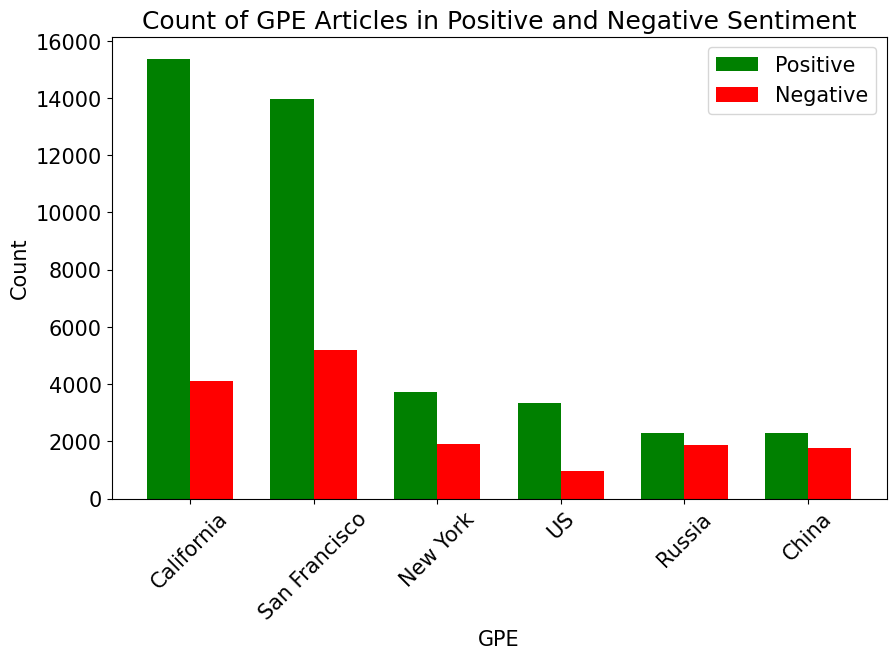

In [ ]:
entities = [ 'California', 'San Francisco', 'New York', 'US', 'Russia', 'China']

positive_entities_df = positive_df[positive_df['entity_name'].isin(entities)]
negative_entities_df = negative_df[negative_df['entity_name'].isin(entities)]

positive_counts = positive_entities_df['entity_name'].value_counts()

negative_counts = negative_entities_df['entity_name'].value_counts()

combined_counts = pd.concat([positive_counts, negative_counts], axis=1, sort=False).fillna(0)
combined_counts.columns = ['Positive', 'Negative']

plt.figure(figsize=(10, 6))
x = np.arange(len(entities))
width = 0.35

plt.bar(x - width/2, combined_counts['Positive'], width, color='green', label='Positive')
plt.bar(x + width/2, combined_counts['Negative'], width, color='red', label='Negative')

plt.title('Count of GPE Articles in Positive and Negative Sentiment')
plt.xlabel('GPE')
plt.ylabel('Count')

plt.xticks(x, entities, rotation=45)
plt.legend()
plt.show()